## We have 3 datasets in the cell_data folder involving cell phone usage. We need to combine them to find out which cell phone models have the most average data usage per month


### 1) Merge the user\_device and user\_usage tables together

#### Try using a left, right, and inner join (or merge) on the two tables, then check the differences in the resultant dataframe's shape. Why do you think you get each result? (Be sure to keep which dataframe is on the left and right consistent)


### 2) We want to analyze our user\_usage information (outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, monthly\_mb) across each phone model ('Marketing Name' column in android\_devices.csv) and each brand ('Retail Branding' column in android\_devices.csv). Merge the dataframes appropriately to make this analysis possible. (Note: the 'device' column in user_device.csv has the same information as 'Model' in android\_devices.csv) 


### 3) Create 2 dataframes showing the following:

#### Dataframe 1) Index should be the brand, and your columns should show the mean of the following: outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, and monthly\_mb. It should be sorted from high to low by monthly_mb.

##### Plot the monthly_mb information by brand


#### Dataframe 2) Index should be the phone model, and your columns should show the sum of the following: outgoing\_mins\_per\_month, outgoing\_sms\_per\_month, and monthly\_mb. It should be sorted from high to low by outgoing\_sms\_per\_month

##### Plot the outgoing\_sms\_per_month by phone model


In [2]:
import pandas as pd
import numpy as np

### 1) Merge the user_device and user_usage tables together

Try using a left, right, and inner join (or merge) on the two tables, then check the differences in the resultant dataframe's shape. Why do you think you get each result? (Be sure to keep which dataframe is on the left and right consistent)

In [3]:
user_device = pd.read_csv('cell_data/user_device.csv')
user_usage = pd.read_csv('cell_data/user_usage.csv')

In [4]:
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [12]:
user_device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 6 columns):
use_id              272 non-null int64
user_id             272 non-null int64
platform            272 non-null object
platform_version    272 non-null float64
device              272 non-null object
use_type_id         272 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 12.8+ KB


In [13]:
user_usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
outgoing_mins_per_month    240 non-null float64
outgoing_sms_per_month     240 non-null float64
monthly_mb                 240 non-null float64
use_id                     240 non-null int64
dtypes: float64(3), int64(1)
memory usage: 7.6 KB


In [5]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [9]:
left_df = pd.merge(user_device, user_usage, left_on='use_id', right_on='use_id',how='left')
print(left_df.shape)
left_df.tail()

(272, 9)


,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
267,23049,29725,android,6.0,SM-G900F,1,344.53,20.53,519.12
268,23050,29726,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN
269,23051,29726,ios,10.2,"iPhone7,2",3,NaN,NaN,NaN
270,23052,29727,ios,10.1,"iPhone8,4",3,NaN,NaN,NaN
271,23053,20257,android,5.1,Vodafone Smart ultra 6,1,42.75,46.83,5191.12


In [8]:
right_df = pd.merge(user_device, user_usage, left_on='use_id', right_on='use_id',how='right')
print(right_df.shape)
right_df.head()

(240, 9)


,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22787,12921.0,android,4.3,GT-I9505,1.0,21.97,4.82,1557.33
1,22788,28714.0,android,6.0,SM-G930F,1.0,1710.08,136.88,7267.55
2,22789,28714.0,android,6.0,SM-G930F,1.0,1710.08,136.88,7267.55
3,22790,29592.0,android,5.1,D2303,1.0,94.46,35.17,519.12
4,22792,28217.0,android,5.1,SM-G361F,1.0,71.59,79.26,1557.33


In [10]:
inner_df = pd.merge(user_device, user_usage, left_on='use_id', right_on='use_id',how='inner')
print(inner_df.shape)
inner_df.head()

(159, 9)


,use_id,user_id,platform,platform_version,device,use_type_id,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
0,22787,12921,android,4.3,GT-I9505,1,21.97,4.82,1557.33
1,22788,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55
2,22789,28714,android,6.0,SM-G930F,1,1710.08,136.88,7267.55
3,22790,29592,android,5.1,D2303,1,94.46,35.17,519.12
4,22792,28217,android,5.1,SM-G361F,1,71.59,79.26,1557.33


## 2) We want to analyze our user_usage information (outgoing_mins_per_month, outgoing_sms_per_month, monthly_mb) across each phone model ('Marketing Name' column in android_devices.csv) and each brand ('Retail Branding' column in android_devices.csv). Merge the dataframes appropriately to make this analysis possible. (Note: the 'device' column in user_device.csv has the same information as 'Model' in android_devices.csv)¶

In [14]:
android = pd.read_csv('cell_data/android_devices.csv')
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14546 entries, 0 to 14545
Data columns (total 4 columns):
Retail Branding    14542 non-null object
Marketing Name     13375 non-null object
Device             14546 non-null object
Model              14546 non-null object
dtypes: object(4)
memory usage: 454.6+ KB


In [15]:
df_all = pd.merge(left_df, android, left_on='device', right_on='Model', how='left')
print(df_all.shape)
df_all.info()

(330, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 13 columns):
use_id                     330 non-null int64
user_id                    330 non-null int64
platform                   330 non-null object
platform_version           330 non-null float64
device                     330 non-null object
use_type_id                330 non-null int64
outgoing_mins_per_month    211 non-null float64
outgoing_sms_per_month     211 non-null float64
monthly_mb                 211 non-null float64
Retail Branding            232 non-null object
Marketing Name             232 non-null object
Device                     232 non-null object
Model                      232 non-null object
dtypes: float64(4), int64(3), object(6)
memory usage: 36.1+ KB


In [17]:
len(df_all['user_id'].unique())

172

### 3) Create 2 dataframes showing the following:
Dataframe 1) Index should be the brand, and your columns should show the mean of the following: outgoing_mins_per_month, outgoing_sms_per_month, and monthly_mb. It should be sorted from high to low by monthly_mb.
Plot the monthly_mb information by brand

In [64]:
df1 = df_all[['Retail Branding',
              'outgoing_mins_per_month',
              'outgoing_sms_per_month',
              'monthly_mb']].groupby('Retail Branding').sum()
df1.sort_values(by=['monthly_mb'],ascending=False,inplace=True)

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

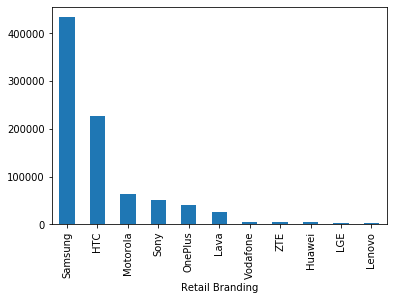

In [82]:
df1['monthly_mb'].plot(kind='bar')

In [83]:
df1

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
Retail Branding,,,
Samsung,20629.09,9978.17,433870.44
HTC,13193.09,4094.61,226339.43
Motorola,1522.04,1050.66,63144.00
Sony,2837.05,642.82,51392.01
OnePlus,2129.13,289.98,39452.46
Lava,121.30,523.80,24917.34
Vodafone,42.75,46.83,5191.12
ZTE,42.75,46.83,5191.12
Huawei,244.58,28.50,4683.68


### Dataframe 2) Index should be the phone model, and your columns should show the sum of the following: outgoing_mins_per_month, outgoing_sms_per_month, and monthly_mb. It should be sorted from high to low by outgoing_sms_per_month

Plot the outgoing_sms_per_month by phone model

In [87]:
df2 = df_all[['Model',
              'outgoing_mins_per_month',
              'outgoing_sms_per_month',
              'monthly_mb']].groupby('Model').sum()

df2.sort_values(by=['outgoing_sms_per_month'],ascending=False,inplace=True)
df2.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb
Model,,,
SM-G900F,5364.76,2479.94,115242.82
HTC Desire 626,2508.70,1493.70,5191.20
GT-I9505,1790.48,1076.33,61211.99
HTC One mini 2,236.40,981.99,41528.87
Moto G (4),1240.68,978.66,62293.44


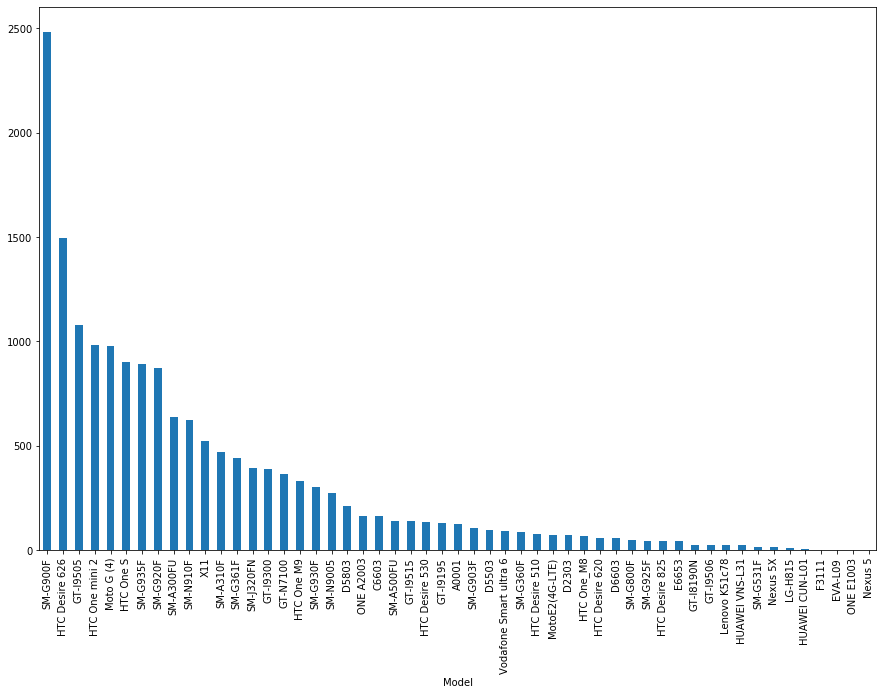

In [90]:
plt.figure(figsize = (15,10))
df2['outgoing_sms_per_month'].plot(kind='bar')